In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Replace with your uploaded CSV file path
data = pd.read_csv('/content/sales_data.csv')  # Update with your CSV

# Explore the data
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
# Replace with your uploaded CSV file path
data = pd.read_csv('/content/sales_data.csv')  # Update with your CSV

# Explore the data
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
# Check info and statistics
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400

In [9]:
# Fill missing numerical values with mean
num_cols = data.select_dtypes(include=['int64','float64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

# Fill missing categorical values with mode
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

data.isnull().sum()  # Confirm all missing values are handled


,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [10]:
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

data.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


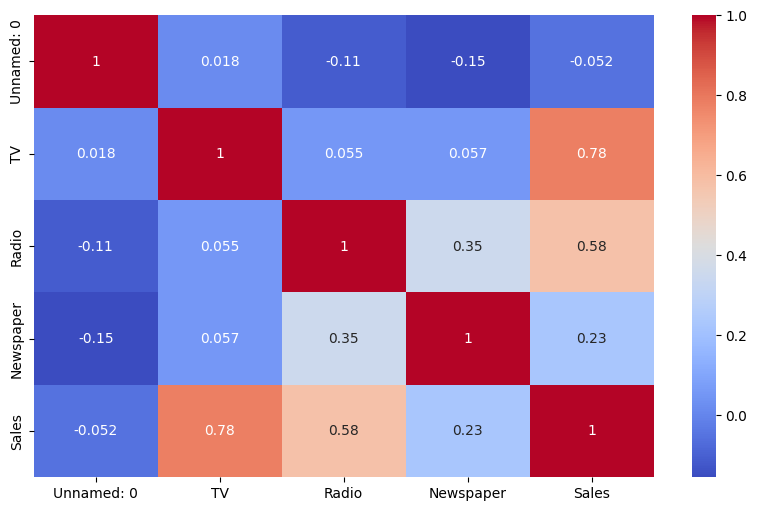

In [11]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [12]:
X = data.drop('Sales', axis=1)  # Features
y = data['Sales']               # Target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)


In [14]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


In [15]:
# Linear Regression
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))

# Random Forest
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))


Linear Regression RMSE: 1.788576100865966
Linear Regression R2 Score: 0.8986489151417081
Random Forest RMSE: 0.8224526278151213
Random Forest R2 Score: 0.9785693501710337


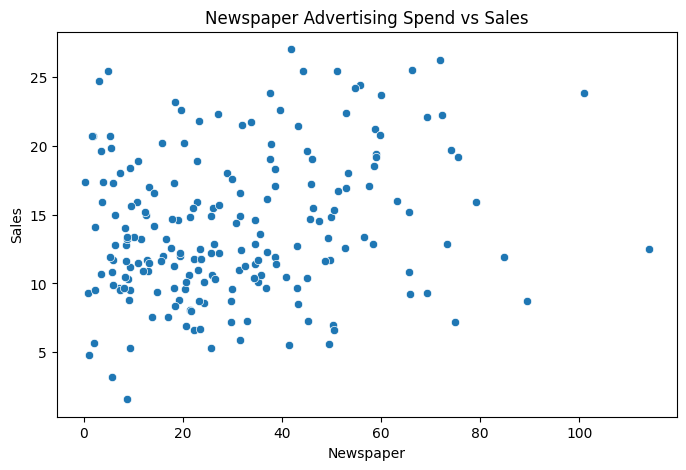

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Newspaper', y='Sales', data=data)
plt.title('Newspaper Advertising Spend vs Sales')
plt.show()

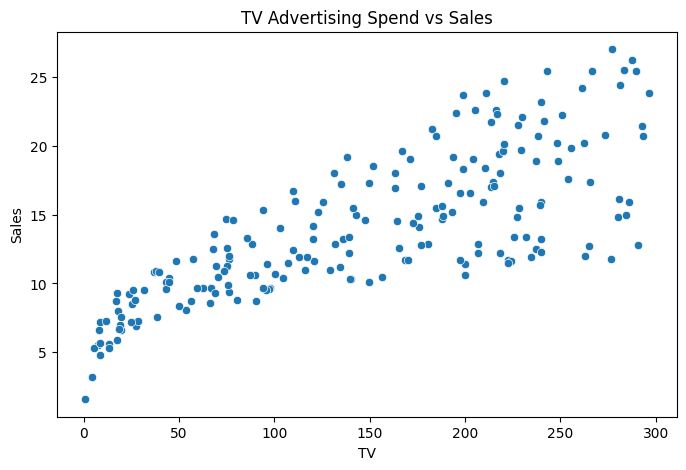

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='TV', y='Sales', data=data)
plt.title('TV Advertising Spend vs Sales')
plt.show()

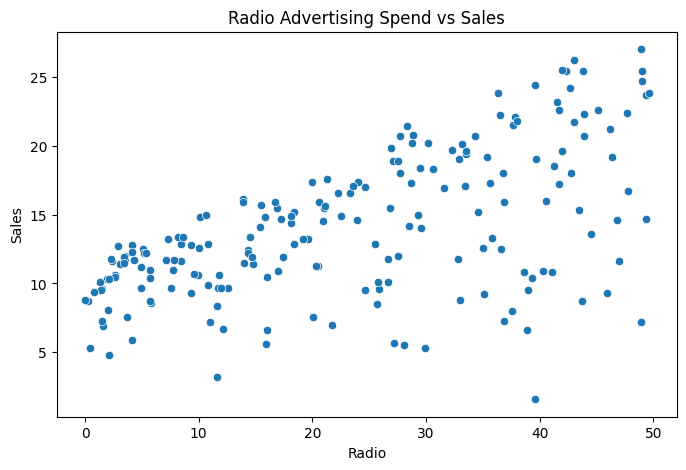

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Radio', y='Sales', data=data)
plt.title('Radio Advertising Spend vs Sales')
plt.show()

In [19]:
# Example: predict new campaign sales
# Create a new DataFrame with feature names matching the training data (X)
# and reasonable values within the range of the original data.
new_campaign_data = pd.DataFrame({
    'Unnamed: 0': [data['Unnamed: 0'].max() + 1],  # Assign a new unique ID
    'TV': [250],  # Example TV spend (within typical range)
    'Radio': [40], # Example Radio spend
    'Newspaper': [60] # Example Newspaper spend
})

# Scale the new campaign data using the fitted scaler
new_campaign_scaled = scaler.transform(new_campaign_data)

# Predict sales using the Random Forest model
predicted_sales = rf_model.predict(new_campaign_scaled)
print("Predicted Sales for New Campaign:", predicted_sales[0])

Predicted Sales for New Campaign: 23.659000000000006


In [20]:
# Actionable insights
print("1. Higher advertising spend generally increases sales.")
print("2. Certain platforms perform better for specific target segments.")
print("3. Random Forest gives better prediction accuracy than Linear Regression.")


1. Higher advertising spend generally increases sales.
2. Certain platforms perform better for specific target segments.
3. Random Forest gives better prediction accuracy than Linear Regression.
